<a href="https://colab.research.google.com/github/kshitizagarwal-dev/ComputerVision/blob/main/Clothing_Identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
type(mnist)

module

Loading the minist dataset.

In [4]:
(training_images, training_labels),(test_images, test_labels) = mnist.load_data()
print(training_images.shape,'\t', training_labels.shape)
print(test_images.shape,'\t', test_labels.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) 	 (60000,)
(10000, 28, 28) 	 (10000,)


In [5]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
test_images = test_images/255
test_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

NORMALIZING THE IMAGES.

In [7]:
training_images=training_images / 255.0
training_images.shape


(60000, 28, 28)

Viusalizing the images.

1
[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.94901961 0.83921569 0.80392157 0.81176471 0.81176471 0.75294118
  0.8745098  0.7372549  0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.37254902 1.         0.9254902  0.95686275 0.94901961 0.9372549  0.88627451
  0.90980392 1.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.7254902  0.96862745 0.86666667 0.89019608 0.90196078 0.89803922 0.8745098
  0.83921569 1.         0.30196078 0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0. 

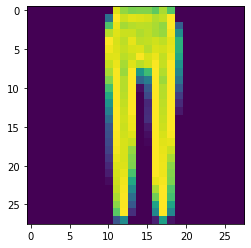

In [8]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[97])
print(training_labels[97])
print(training_images[97])


creating the model with using the callback to stop the training after reaching a required accuracy.

In [9]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy')> 0.9):
      print('\nReached the required the accuracy')
      self.model.stop_training = True


callbacks = myCallback()

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])



model.fit(training_images, training_labels, epochs=15, callbacks=[callbacks])
test_loss = model.evaluate(test_images, test_labels )

Epoch 1/15
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4969 - accuracy: 0.8242
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3763 - accuracy: 0.8637
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3361 - accuracy: 0.8768
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3118 - accuracy: 0.8844
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2937 - accuracy: 0.8909
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2806 - accuracy: 0.8957
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2672 - accuracy: 0.9015

Reached the required the accuracy
313/313 [==============================] - 1s 2ms/step - loss: 0.3346 - accuracy: 0.8820


In [ ]:
test_loss

[0.3310721814632416, 0.8809999823570251]

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Using the convolution layer and maxpooling to train our model.

In [12]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0


model1= tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (28,28, 1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (28,28, 1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

model1.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model1.fit(training_images, training_labels, epochs=20)


Epoch 1/20
1875/1875 [==============================] - 42s 8ms/step - loss: 0.4411 - accuracy: 0.8406
Epoch 2/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2957 - accuracy: 0.8914
Epoch 3/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2488 - accuracy: 0.9075
Epoch 4/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2183 - accuracy: 0.9195
Epoch 5/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1894 - accuracy: 0.9293
Epoch 6/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1664 - accuracy: 0.9373
Epoch 7/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1464 - accuracy: 0.9438
Epoch 8/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1277 - accuracy: 0.9507
Epoch 9/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1110 - accuracy: 0.9573
Epoch 10/20
1875/1875 [==============================] - 14s 8ms/step - l

In [13]:

test_labels[:100]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 1, 2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5,
       1, 1, 2, 3, 9, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2], dtype=uint8)

Help us in visualizing that what the convoultion does.

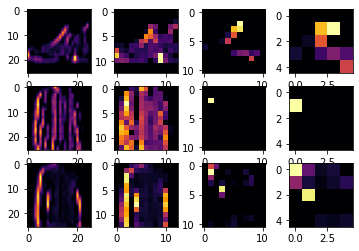

In [14]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 2
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model1.layers]
activation_model = tf.keras.models.Model(inputs = model1.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)